# Proyecto 3 de ACAMICA aplicando un modelo de machine learning sistemas de recomendacion usando la base de datos por la plataforma de video juegos mundial STEAM

### Por Angelo Mauro Calderon


Origen de los datos de juegos y reviews https://github.com/kang205/sd Son dos archivos, uno de calificaciones y otro de información sobre los juegos.


Se importa la inforcaion de las reviews por juego

In [1]:
import gzip
import pandas as pd

def parse(path):
    g = gzip.open(path, 'r')
    for l in g:
        yield eval(l)

contador = 0
data_reviews = []

n = 7
for l in parse('Downloads/steam_reviews.json.gz'):
    if contador%n == 0:
        data_reviews.append(l)
    else:
        pass
    contador += 1

data_reviews = pd.DataFrame(data_reviews)
data_reviews.head(3)

,username,hours,products,product_id,page_order,date,text,early_access,page,user_id,found_funny,compensation
0,Chaos Syren,0.1,41.0,725280,0,2017-12-17,This would not be acceptable as an entertainme...,False,1,NaN,NaN,NaN
1,Sneaky_Panda,0.6,243.0,725280,3,2017-11-27,If you take a discount - it's not a bad horror...,False,1,NaN,NaN,NaN
2,Coby,8.9,227.0,35140,3,2018-01-03,Finished the game around 6 hours. Thats only t...,False,1,NaN,NaN,NaN


 Se importa el Dataset con la info de los juegos

In [2]:
data_games = []
for l in parse('Downloads/steam_games.json.gz'):
    data_games.append(l)
data_games = pd.DataFrame(data_games)
data_games.head()

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",4.49,http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,False,761140,Kotoshiro,NaN,NaN
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",NaN,http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,643980,Secret Level SRL,Mostly Positive,NaN
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",NaN,http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,670290,Poolians.com,Mostly Positive,NaN
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",0.83,http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,False,767400,彼岸领域,NaN,NaN
4,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"[Action, Indie, Casual, Sports]",1.79,http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.99,False,773570,NaN,NaN,NaN


In [3]:
data_reviews.isna().sum()

username              0
hours              3817
products           2228
product_id            0
page_order            0
date                  0
text                  0
early_access          0
page                  0
user_id          660348
found_funny      942194
compensation    1092435
dtype: int64

Text(0, 0.5, 'Frecuencia por bins')

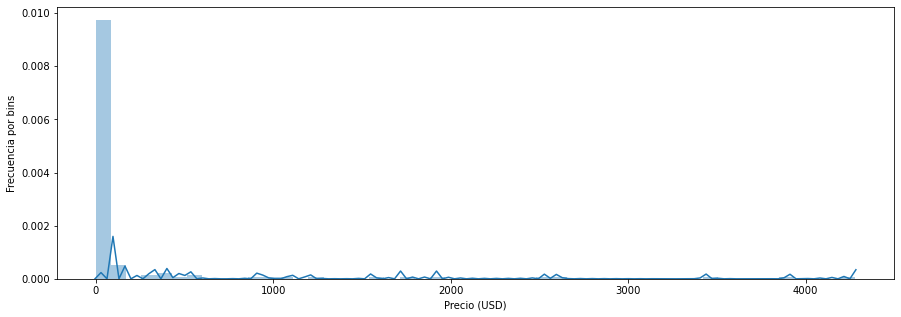

In [4]:

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,5))
ax = sns.distplot(data_games.price.value_counts())
ax.set_xlabel('Precio (USD)')
ax.set_ylabel('Frecuencia por bins')

### La mayoria de precio por videojuegos oscila hasta los USD30 

Text(0, 0.5, 'Frecuencia por bins')

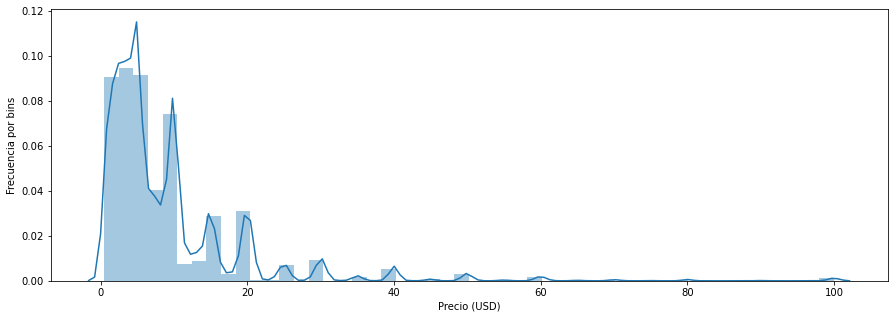

In [5]:

# Excluiremos para este gráfico los valores con caracteres no numéricos para explorar los precios de los juegos

data_games2 = data_games.drop(data_games[(data_games.price == 'Free To Play') |
                                         (data_games.price == 'Free to Play') |
                                        (data_games.price == 'Free') |
                                        (data_games.price == 'Free Demo') |
                                        (data_games.price == 'Play for Free!') |
                                        (data_games.price == 'Install Now') |
                                        (data_games.price == 'Play WARMACHINE: Tactics Demo') |
                                        (data_games.price == 'Free Mod') |
                                        (data_games.price == 'Install Theme') |
                                        (data_games.price == 'Third-party') |
                                        (data_games.price == 'Play Now') |
                                        (data_games.price == 'Free HITMAN™ Holiday Pack') |
                                        (data_games.price == 'Play the Demo') |
                                        (data_games.price == 'Starting at $499.00')|
                                        (data_games.price == 'Starting at $449.00') |
                                        (data_games.price == 'Free to Try') |
                                        (data_games.price == 'Free Movie') |
                                        (data_games.price == 'Free To Use') |
                                        (data_games.price == 'Free to Use')].index)

data_games2 = data_games2[data_games2.price<=100]
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.distplot(data_games2.price)
ax.set_xlabel('Precio (USD)')
ax.set_ylabel('Frecuencia por bins')

### Se relacionaran los juemos que los usuarios hayan jugado por mas de 5 horas:

In [6]:
import time

match = pd.DataFrame(columns=['publisher','genres','app_name','title','total_hours_played','url','release_date','tags','discount_price','reviews_url','specs','price','early_access','id','developer','sentiment','metascore']  )
#for i in range(1,len(data_reviews)):
for i in range(0,100):
    print(i, end="\r")
    time.sleep(0.1)
    match_id=data_reviews[data_reviews.hours > 5].product_id.value_counts().index[i]
    match=match.append(data_games[data_games.id==match_id])
    match['total_hours_played'].iloc[i]=data_reviews[data_reviews.product_id == str(match_id)].product_id.astype(int).sum()

match.head(3)

,publisher,genres,app_name,title,total_hours_played,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
31856,Valve,"[Action, Free to Play]",Team Fortress 2,Team Fortress 2,11502040,http://store.steampowered.com/app/440/Team_For...,2007-10-10,"[Free to Play, Multiplayer, FPS, Action, Shoot...",NaN,http://steamcommunity.com/app/440/reviews/?bro...,"[Multi-player, Cross-Platform Multiplayer, Ste...",Free to Play,False,440,Valve,Very Positive,92
29692,Facepunch Studios,"[Action, Adventure, Indie, Massively Multiplay...",Rust,Rust,3696958580,http://store.steampowered.com/app/252490/Rust/,2013-12-11,"[Early Access, Survival, Crafting, Multiplayer...",NaN,http://steamcommunity.com/app/252490/reviews/?...,"[Multi-player, MMO, Cross-Platform Multiplayer...",19.99,True,252490,Facepunch Studios,Very Positive,NaN
30746,"2K Games, Aspyr (Mac &amp;amp; Linux)","[Action, RPG]",Borderlands 2,Borderlands 2,513918560,http://store.steampowered.com/app/49520/Border...,2012-09-17,"[FPS, Co-op, Action, RPG, Loot, Shooter, Open ...",NaN,http://steamcommunity.com/app/49520/reviews/?b...,"[Single-player, Co-op, Steam Achievements, Ful...",19.99,False,49520,"Gearbox Software,Aspyr (Mac &amp; Linux)",Overwhelmingly Positive,89


In [7]:
print( 'Cantidad de usuarios:')
len(data_reviews.user_id)

Cantidad de usuarios:


1113296

In [8]:
print('Cantidad de juegos calificados por los usuarios:')

data_reviews.username.value_counts()

Cantidad de juegos calificados por los usuarios:


123                     304
Alex                    249
Nick                    218
Chris                   189
..                      182
                       ... 
v_Wolf_v                  1
sahjot                    1
Настя                     1
Unfortunately, Gavin      1
mr_underhill              1
Name: username, Length: 713170, dtype: int64

In [9]:
print('Juegos mas populares:')

for i in range(0,9):
    print(data_games[data_games.id==str(data_reviews.product_id.value_counts().index[i])].title.values)

Juegos mas populares:
['Team Fortress 2']
['Rust']
['Borderlands 2']
['Fallout 4']
['Grand Theft Auto V']
['Undertale']
['Portal 2']
['DayZ']
['Warframe']


In [10]:
print('Juegos menos populares:')

for i in range(0,9):
    print(data_games[data_games.id==str(data_reviews.product_id.value_counts(ascending=True).index[i])].title.values)

Juegos menos populares:
['eden - 3D Screensaver']
['Printer Forge 3D']
['DROD: The Second Sky']
['Flag N Frag']
['Iggle Pop Deluxe']
['Luxor 2']
['WE ARE DOOMED']
['Achievement Hunter: Offensive']
['Deadly Sin']


### Eliminaremos los valores faltantes de user_id, product_id y metascore, debido a que sin ellos no podremos entrenar el modelo. Hay demasiada informacion como para creer sustituir asi que no afectara...

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Los valores fantantes de las variables mencionadas son:

In [12]:
data_reviews.product_id.isna().sum()

0

In [13]:
data_reviews.user_id.isna().sum()

660348

In [14]:
data_reviews.product_id = data_reviews.product_id.replace(['NA'],np.nan)
data_reviews = data_reviews[~data_reviews.product_id.isna()]
data_reviews = data_reviews[~data_reviews.user_id.isna()]
data_reviews.shape

(452948, 12)

Distribucion de calificacion en relacion a horas jugadas

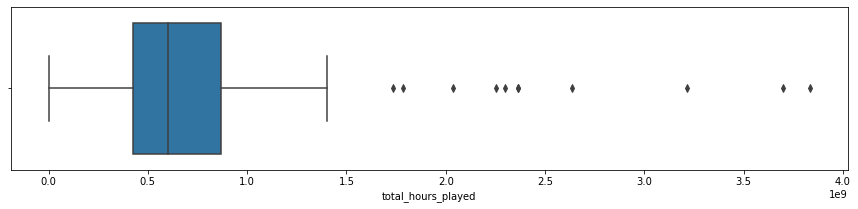

In [15]:
plt.subplots(figsize=(15,3))
sns.boxplot(x=match['total_hours_played'])

Cada usuario por juego y horas

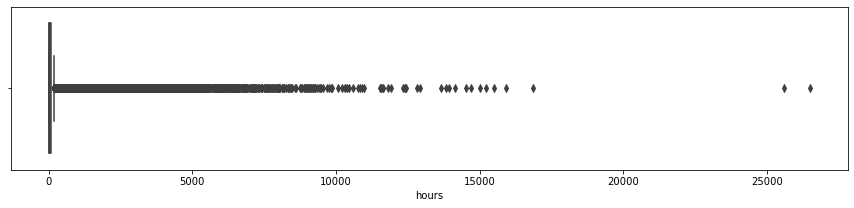

In [16]:
plt.subplots(figsize=(15,3))
sns.boxplot(x=data_reviews[~data_reviews['hours'].isna()]['hours'])

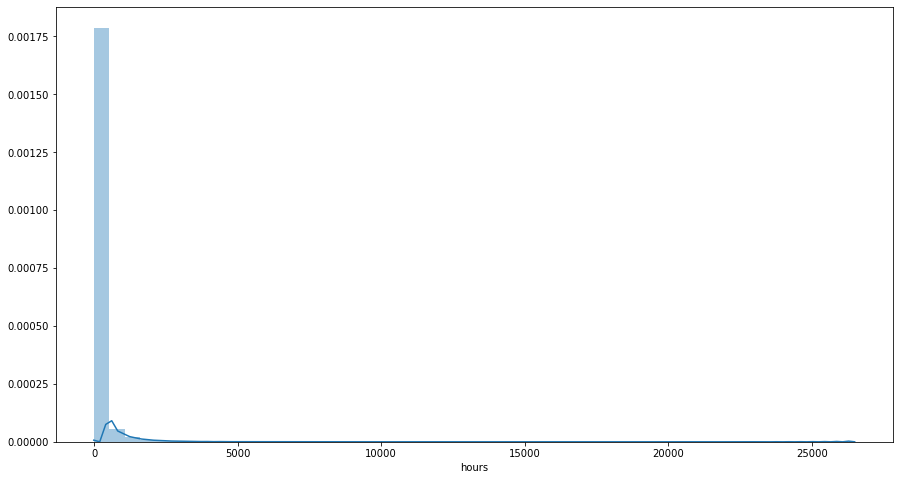

In [17]:
plt.subplots(figsize=(15,8))
sns.distplot(data_reviews[~data_reviews['hours'].isna()]['hours'])

Hay demasiado outlier que se eliminara de los usuarios con excesas horas de juego:

In [18]:
valor_medio = data_reviews['hours'].mean()
std = data_reviews['hours'].std()
minimo = valor_medio - 3*std
maximo = valor_medio + 3*std
mascara_outliers = np.logical_or(data_reviews['hours'] < minimo, data_reviews['hours'] > maximo)
print(valor_medio, std, minimo, maximo)

121.26549068384124 390.46328053736795 -1050.1243509282624 1292.655332295945


In [19]:
mascara_outliers.value_counts()

False    445375
True       7573
Name: hours, dtype: int64

In [20]:
data_reviews = data_reviews[~mascara_outliers]
data_reviews['hours'].describe()

count    444276.000000
mean         82.877335
std         174.037405
min           0.000000
25%           4.600000
50%          17.900000
75%          68.100000
max        1292.500000
Name: hours, dtype: float64

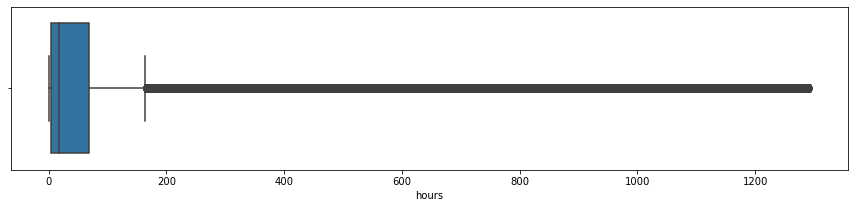

In [21]:
plt.subplots(figsize=(15,3))
sns.boxplot(x=data_reviews[~data_reviews['hours'].isna()]['hours'])

Filtro de mas de 2 usuarios que hayan jugado mas de 20 horas de juego:

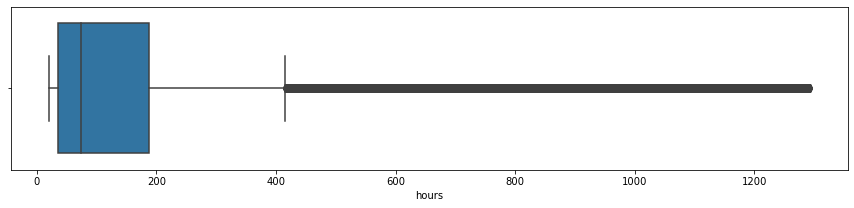

In [22]:
data_reviews = data_reviews[data_reviews['hours'] >= 20]
plt.subplots(figsize=(15,3))
sns.boxplot(x=data_reviews[~data_reviews['hours'].isna()]['hours'])

In [23]:
data_reviews.user_id.value_counts()

76561197969749884    93
76561198011965365    23
76561198010131631    16
76561198010800766    15
76561198014906902    12
                     ..
76561198036447037     1
76561198247779572     1
76561198244163882     1
76561197985890281     1
76561198198467381     1
Name: user_id, Length: 186853, dtype: int64

Se eliminan los juegos con menos de 2 reviews

In [24]:
print(data_reviews.shape)
data_reviews = data_reviews.groupby('user_id').filter(lambda x: len(x) >= 2)
data_reviews.user_id.value_counts()
print(data_reviews.shape)

(212142, 12)
(44957, 12)


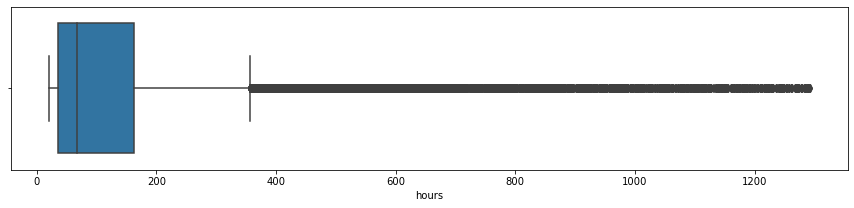

In [25]:
plt.subplots(figsize=(15,3))
sns.boxplot(x=data_reviews[~data_reviews['hours'].isna()]['hours'])

Juegos con mas reviews

In [26]:
match.iloc[0]

publisher                                                         Valve
genres                                           [Action, Free to Play]
app_name                                                Team Fortress 2
title                                                   Team Fortress 2
total_hours_played                                             11502040
url                   http://store.steampowered.com/app/440/Team_For...
release_date                                                 2007-10-10
tags                  [Free to Play, Multiplayer, FPS, Action, Shoot...
discount_price                                                      NaN
reviews_url           http://steamcommunity.com/app/440/reviews/?bro...
specs                 [Multi-player, Cross-Platform Multiplayer, Ste...
price                                                      Free to Play
early_access                                                      False
id                                                              

Juegos mas populares:

In [27]:
match.head()

,publisher,genres,app_name,title,total_hours_played,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
31856,Valve,"[Action, Free to Play]",Team Fortress 2,Team Fortress 2,11502040,http://store.steampowered.com/app/440/Team_For...,2007-10-10,"[Free to Play, Multiplayer, FPS, Action, Shoot...",NaN,http://steamcommunity.com/app/440/reviews/?bro...,"[Multi-player, Cross-Platform Multiplayer, Ste...",Free to Play,False,440,Valve,Very Positive,92
29692,Facepunch Studios,"[Action, Adventure, Indie, Massively Multiplay...",Rust,Rust,3696958580,http://store.steampowered.com/app/252490/Rust/,2013-12-11,"[Early Access, Survival, Crafting, Multiplayer...",NaN,http://steamcommunity.com/app/252490/reviews/?...,"[Multi-player, MMO, Cross-Platform Multiplayer...",19.99,True,252490,Facepunch Studios,Very Positive,NaN
30746,"2K Games, Aspyr (Mac &amp;amp; Linux)","[Action, RPG]",Borderlands 2,Borderlands 2,513918560,http://store.steampowered.com/app/49520/Border...,2012-09-17,"[FPS, Co-op, Action, RPG, Loot, Shooter, Open ...",NaN,http://steamcommunity.com/app/49520/reviews/?b...,"[Single-player, Co-op, Steam Achievements, Ful...",19.99,False,49520,"Gearbox Software,Aspyr (Mac &amp; Linux)",Overwhelmingly Positive,89
25017,Bethesda Softworks,[RPG],Fallout 4,Fallout 4,3832322760,http://store.steampowered.com/app/377160/Fallo...,2015-11-09,"[Open World, Post-apocalyptic, Exploration, Si...",NaN,http://steamcommunity.com/app/377160/reviews/?...,"[Single-player, Steam Achievements, Full contr...",29.99,False,377160,Bethesda Game Studios,Mixed,84
26955,Rockstar Games,"[Action, Adventure]",Grand Theft Auto V,Grand Theft Auto V,2299824120,http://store.steampowered.com/app/271590/Grand...,2015-04-14,"[Open World, Action, Multiplayer, First-Person...",NaN,http://steamcommunity.com/app/271590/reviews/?...,"[Single-player, Multi-player, Steam Achievemen...",39.99,False,271590,Rockstar North,Mixed,96


In [28]:
data_games = data_games.rename(columns={'id':'product_id'})
data_reviews = data_reviews.merge(data_games, on='product_id', how='left')

# Transformaremos los tipos de datos
data_reviews.metascore = data_reviews.metascore.replace(['NA'],np.nan)
data_reviews.metascore = data_reviews.metascore.astype(np.float32)
data_reviews.product_id = data_reviews.product_id.astype(int) 

data_reviews.metascore.value_counts()

84.0    2571
81.0    2122
88.0    1879
89.0    1840
92.0    1715
        ... 
48.0       2
27.0       1
20.0       1
50.0       1
24.0       1
Name: metascore, Length: 61, dtype: int64

In [29]:
# Eliminaremos los valores faltatentes

print(data_reviews.shape)
data_reviews = data_reviews[~data_reviews.metascore.isna()]
print(data_reviews.shape)

(44987, 27)
(31035, 27)


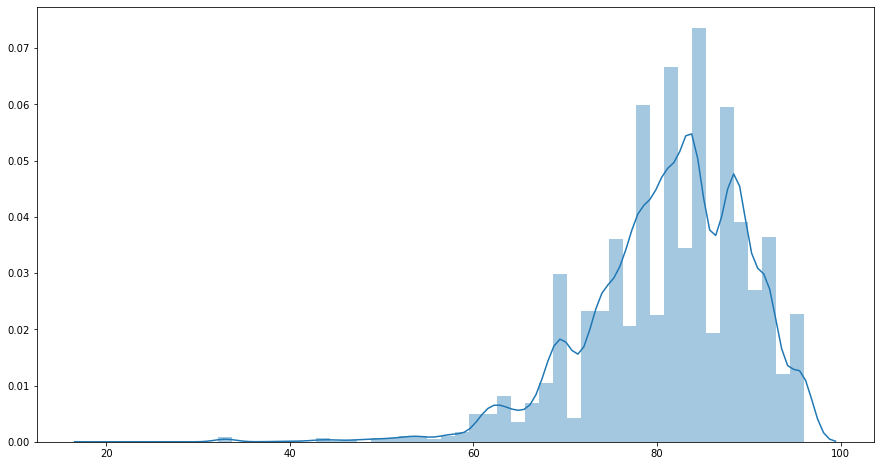

In [30]:
plt.subplots(figsize=(15,8))
sns.distplot(data_reviews.metascore.astype(int).values)

Observando el nivel de sesgo en la distribución de metascores, filtraremos nuestro dataset a solo las reviews y juegos con metascore mayor a 55.0

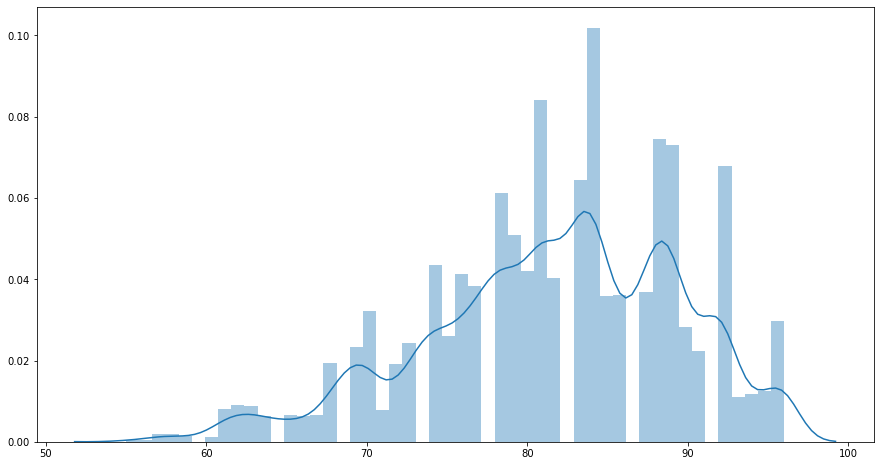

In [31]:
data_reviews = data_reviews[data_reviews.metascore >= 55]
plt.subplots(figsize=(15,8))
sns.distplot(data_reviews.metascore.astype(int).values)

In [32]:
data_reviews = data_reviews.drop(columns=['products','page_order','date','text','early_access_x','page','found_funny','compensation','publisher','app_name','url','release_date','tags','discount_price','reviews_url','specs','early_access_y','developer','sentiment'])
data_reviews.head(2)

,username,hours,product_id,user_id,genres,title,price,metascore
0,Kevin Droid,21.6,35140,76561198030870442,"[Action, Adventure]",Batman: Arkham Asylum Game of the Year Edition,19.99,91.0
3,tung.tungnguyen trade.tf,114.8,271590,76561198211759421,"[Action, Adventure]",Grand Theft Auto V,39.99,96.0


In [33]:
data_reviews.to_csv('data_reviews 24 12 2020.csv', sep=',')

In [34]:
data_games = data_games[~data_games.product_id.isna()]
data_games.product_id = data_games.product_id.astype(int)

## Entrenamiento de modelos

Eligiremos como target el feature metascore, ya que es proporcional al rating de satisfacción de cada juego

In [35]:
!pip install scikit-surprise
import warnings
warnings.simplefilter( action = 'ignore' )

In [36]:
!pip install surprise

from surprise import Dataset
from surprise import Reader
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise import KNNBasic,  KNNWithMeans, KNNBaseline
from surprise.model_selection import KFold
from surprise import NormalPredictor
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV

# Parametrizamos el modelo para que el rating o metascore se interprete como una cantidad que puede variar entre 1 y 100.

reader = Reader(rating_scale=(1, 100))

df1 = data_reviews.copy()
df1 = df1.drop(['metascore','genres','title','title','price'], axis=1)
df1.head(2)

,username,hours,product_id,user_id
0,Kevin Droid,21.6,35140,76561198030870442
3,tung.tungnguyen trade.tf,114.8,271590,76561198211759421


In [37]:
data_games_train = data_games.copy()
df1= pd.merge(df1, data_games_train, on='product_id', how='inner')
df1['user_id'] = df1['user_id'].dropna()
df1 = df1[~df1['user_id'].isnull()]
df1 = df1[df1['metascore']!='NA']
df1.head(2)

,username,hours,product_id,user_id,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,developer,sentiment,metascore
0,Kevin Droid,21.6,35140,76561198030870442,"Warner Bros. Interactive Entertainment, Feral ...","[Action, Adventure]",Batman: Arkham Asylum Game of the Year Edition,Batman: Arkham Asylum Game of the Year Edition,http://store.steampowered.com/app/35140/Batman...,2010-03-26,"[Action, Batman, Stealth, Adventure, Third Per...",NaN,http://steamcommunity.com/app/35140/reviews/?b...,"[Single-player, Steam Achievements, Steam Trad...",19.99,False,"Rocksteady Studios,Feral Interactive (Mac)",Overwhelmingly Positive,91
1,Fugitive Mind,20.7,35140,76561198105445916,"Warner Bros. Interactive Entertainment, Feral ...","[Action, Adventure]",Batman: Arkham Asylum Game of the Year Edition,Batman: Arkham Asylum Game of the Year Edition,http://store.steampowered.com/app/35140/Batman...,2010-03-26,"[Action, Batman, Stealth, Adventure, Third Per...",NaN,http://steamcommunity.com/app/35140/reviews/?b...,"[Single-player, Steam Achievements, Steam Trad...",19.99,False,"Rocksteady Studios,Feral Interactive (Mac)",Overwhelmingly Positive,91


In [38]:
# Cargamos los datos según indica la librería Surprise, en el dataset "data"

data = Dataset.load_from_df(df1[['user_id', 'product_id', 'metascore']], reader)
data

In [39]:
trainset, testset = train_test_split(data, test_size=.25)
print(trainset)

### Benchmark

In [40]:
from surprise import SVD
algo = SVD()
algo.fit(trainset)

In [41]:
predictions = algo.test(testset)
predictions[0]

Prediction(uid='76561198197904026', iid=225540, r_ui=74.0, est=74.53756183791351, details={'was_impossible': False})

Hay un resultado de 80% en prediccion lo cual se cree poder mejorar

In [42]:
df1[['user_id', 'product_id', 'hours']][df1['user_id']=='76561198135446411']

,user_id,product_id,hours
13514,76561198135446411,208580,449.5


In [43]:
print('Usuarios con mayor cantidad de reviews:')

data_reviews.user_id.value_counts()


Usuarios con mayor cantidad de reviews:


76561197969749884    56
76561198010800766    13
76561198011965365    11
76561198010131631    10
76561198043627942    10
                     ..
76561198123457882     1
76561198099509764     1
76561198119604970     1
76561198041180088     1
76561198239452434     1
Name: user_id, Length: 16763, dtype: int64

In [44]:
print(' Los 3 primeros juegos del usuario con mas reviews:')

data_reviews[data_reviews.user_id=='76561197969749884'].head(3)

 Los 3 primeros juegos del usuario con mas reviews:


,username,hours,product_id,user_id,genres,title,price,metascore
177,Sarkoth,53.9,234710,76561197969749884,"[Casual, Sports]",Poker Night 2,4.99,75.0
284,Sarkoth,67.4,308420,76561197969749884,"[Action, Indie, RPG]",Ziggurat,14.99,75.0
962,Sarkoth,49.2,204530,76561197969749884,"[Action, Indie, Strategy]",Infested Planet,14.99,75.0


In [45]:
data_games[data_games.product_id==234710] #Es uno de los juegos que 76561197969749884 hizo review

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,product_id,developer,sentiment,metascore
1362,Telltale Games,"[Casual, Sports]",Poker Night 2,Poker Night 2,http://store.steampowered.com/app/234710/Poker...,2013-04-26,"[Casual, Card Game, Comedy, Singleplayer, Gamb...",NaN,http://steamcommunity.com/app/234710/reviews/?...,"[Single-player, Full controller support]",4.99,False,234710,Telltale Games,Very Positive,75


In [46]:
print('Vamos a predecir cuanta calificacion podra darle este usuario al juego que mas ha jugado:')

algo.predict(76561197969749884,234710)

Vamos a predecir cuanta calificacion podra darle este usuario al juego que mas ha jugado:


Prediction(uid=76561197969749884, iid=234710, r_ui=None, est=81.61475232532987, details={'was_impossible': False})

Vemos que nuestro modelo predice que este usuario del 100% un 81% si calificaria el videojuego pero necesitamos que mejore porque sigue siendo muy simple

Ahora analizaremos a este usuario con los juegos que mas le gustaron

In [47]:
usuario = '76561197969749884'
df_user = df1[(df1['user_id'] == usuario) & (df1['metascore'] >= 70.0)]
df_user = df_user.reset_index(drop=True)
df_user.metascore.describe()

count     44
unique    19
top       75
freq       6
Name: metascore, dtype: int64

Guardaremos las recomendaciones

In [48]:
recomendaciones_usuario = data_games[['title','product_id']].iloc[:4499].copy()
recomendaciones_usuario.index = recomendaciones_usuario.product_id
recomendaciones_usuario = recomendaciones_usuario.drop(['product_id'], axis=1)
print(recomendaciones_usuario.shape)
recomendaciones_usuario.head()

(4499, 1)


,title
product_id,
761140,Lost Summoner Kitty
643980,Ironbound
670290,Real Pool 3D - Poolians
767400,弹炸人2222
773570,NaN


In [49]:
usuario_vistas = df1[['user_id', 'product_id', 'metascore']][df1['user_id'] == usuario]
print(usuario_vistas.shape)
usuario_vistas.head()

(56, 3)


,user_id,product_id,metascore
762,76561197969749884,234710,75
896,76561197969749884,308420,75
1660,76561197969749884,204530,75
1876,76561197969749884,214340,74
2091,76561197969749884,18120,73


In [50]:
recomendaciones_usuario = recomendaciones_usuario.reset_index()
recomendaciones_usuario.head()

,product_id,title
0,761140,Lost Summoner Kitty
1,643980,Ironbound
2,670290,Real Pool 3D - Poolians
3,767400,弹炸人2222
4,773570,NaN


Generamos las recomendaciones

In [51]:
recomendaciones_usuario['Estimate_Score'] = recomendaciones_usuario['product_id'].apply(lambda x: algo.predict(usuario, x).est)
recomendaciones_usuario = recomendaciones_usuario.sort_values('Estimate_Score', ascending=False)
recomendaciones_usuario.head(10)

,product_id,title,Estimate_Score
95,7670,BioShock™,91.252202
631,620,Portal 2,90.130447
252,22330,The Elder Scrolls IV: Oblivion® Game of the Ye...,89.764885
188,22000,World of Goo,89.535422
253,22320,The Elder Scrolls III: Morrowind® Game of the ...,89.301199
98,4760,Rome: Total War™ - Collection,87.283371
1672,238010,Deus Ex: Human Revolution - Director's Cut,86.399878
4366,391540,Undertale,86.182788
792,202200,Galactic Civilizations® II: Ultimate Edition,85.338049
28,70,Half-Life,85.268294


In [52]:
recomendaciones_usuario.shape

(4499, 3)

Lamentablemente ninguno de los juegos coinciden con los que eligio teniendo en cuenta que usamos el metascore....usaremos el RMSE como metodo de evaluacion....

Para el conjunto de testset, evaluamos el error RMSE entre las predicciones.

RMSE es solo la raíz cuadrada de MSE. La raíz cuadrada se introduce para hacer que la escala de los errores sea igual a la escala de los objetivos.

Usaremos RMSE ya que al tomar la raíz cuadrada de MSE, aumentamos la sensibilidad a errores consdierados como outliers.

In [53]:
from surprise import accuracy

rmse_svd_1 = accuracy.rmse(predictions)

accuracy.rmse(predictions)

RMSE: 3.1308
RMSE: 3.1308


3.1308218219946005

### Optimización de parámetros, segundo modelo (SVD)

In [54]:
from surprise.model_selection import cross_validate

rmse_test_means = []
factores = [1,2,4,8,16,32,64,128,256]

for factor in factores:
    print(factor)
    algo = SVD(n_factors=factor)
    cv = cross_validate(algo, data, measures=['RMSE'], cv = 3, verbose=True)
    rmse_test_means.append(np.mean(cv['test_rmse']))

1
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    2.6828  2.7278  2.7193  2.7100  0.0195  
Fit time          0.98    0.91    1.02    0.97    0.04    
Test time         0.28    0.54    0.21    0.34    0.14    
2
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    2.7331  2.7237  2.7026  2.7198  0.0128  
Fit time          0.89    0.96    1.09    0.98    0.08    
Test time         0.25    0.51    0.25    0.34    0.12    
4
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    2.6849  2.8755  2.7580  2.7728  0.0785  
Fit time          1.08    1.12    1.04    1.08    0.03    
Test time         0.27    0.25    0.24    0.26    0.01    
8
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    2.7735  2.7

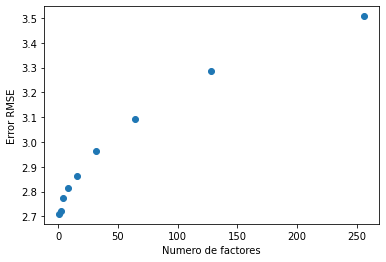

In [55]:
plt.scatter(factores, rmse_test_means)
plt.xlabel('Numero de factores')
plt.ylabel('Error RMSE')
plt.show()

In [56]:
from surprise.model_selection import GridSearchCV

param_grid = {'n_factors': [5,50,100],'n_epochs': [5, 10,20], 'lr_all': [0.001, 0.002, 0.005],
              'reg_all': [0.002, 0.02, 0.2]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3, n_jobs = -1)
gs.fit(data)

In [57]:
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

2.7664794104179897
{'n_factors': 5, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.002}


In [58]:
rmse_test_means = []
factores = [1,2,4,5,8,16,32,64,128,256]

for factor in factores:
    print(factor)
    algo = SVD(n_factors=factor, n_epochs=20, lr_all=0.005, reg_all=0.002)
    cv = cross_validate(algo, data, measures=['RMSE'], cv = 3, verbose=True)
    rmse_test_means.append(np.mean(cv['test_rmse']))

1
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    2.6666  2.7110  2.7354  2.7043  0.0285  
Fit time          0.83    0.98    0.99    0.93    0.07    
Test time         0.48    0.28    0.25    0.34    0.10    
2
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    2.7672  2.7123  2.7279  2.7358  0.0231  
Fit time          1.09    0.96    0.87    0.97    0.09    
Test time         0.30    0.21    0.25    0.25    0.04    
4
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    2.7508  2.6984  2.7937  2.7476  0.0390  
Fit time          1.03    1.19    1.01    1.08    0.08    
Test time         0.27    0.26    0.25    0.26    0.00    
5
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    2.7094  2.7

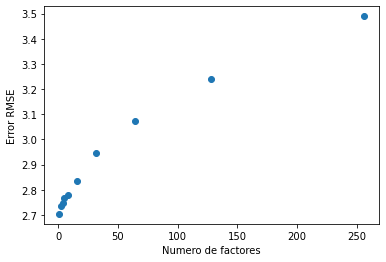

In [59]:
plt.scatter(factores, rmse_test_means)
plt.xlabel('Numero de factores')
plt.ylabel('Error RMSE')
plt.show()

## Con estos parámetros, reentrenaremos un tercer modelo (SVD) y mediremos las recomendaciones:

In [60]:
reader = Reader(rating_scale=(1, 100))
data = Dataset.load_from_df(df1[['user_id', 'product_id', 'metascore']], reader)
trainset, testset = train_test_split(data, test_size=.25)
algo = SVD(n_factors=5, n_epochs=20, lr_all=0.005, reg_all=0.002)
algo.fit(trainset)
predictions = algo.test(testset)

In [61]:
usuario = 76561198011965365
df_user = df1[(df1['user_id'] == usuario) & (df1['metascore'] >= 70.0)]
df_user = df_user.reset_index(drop=True)

recomendaciones_usuario = data_games[['title','product_id']].iloc[:4499].copy()
recomendaciones_usuario.index = recomendaciones_usuario.product_id
recomendaciones_usuario = recomendaciones_usuario.drop(['product_id'], axis=1)
print(recomendaciones_usuario.shape)
recomendaciones_usuario.head()

(4499, 1)


,title
product_id,
761140,Lost Summoner Kitty
643980,Ironbound
670290,Real Pool 3D - Poolians
767400,弹炸人2222
773570,NaN


In [62]:
usuario_vistas = df1[['user_id', 'product_id', 'metascore']][df1['user_id'] == usuario]
print(usuario_vistas.shape)
usuario_vistas.head()

(0, 3)


,user_id,product_id,metascore


In [63]:
recomendaciones_usuario = recomendaciones_usuario.reset_index()
recomendaciones_usuario.head()

,product_id,title
0,761140,Lost Summoner Kitty
1,643980,Ironbound
2,670290,Real Pool 3D - Poolians
3,767400,弹炸人2222
4,773570,NaN


In [64]:
recomendaciones_usuario['Estimate_Score'] = recomendaciones_usuario['product_id'].apply(lambda x: algo.predict(usuario, x).est)
recomendaciones_usuario = recomendaciones_usuario.sort_values('Estimate_Score', ascending=False)
recomendaciones_usuario.head(10)

,product_id,title,Estimate_Score
95,7670,BioShock™,95.137585
631,620,Portal 2,94.931793
28,70,Half-Life,94.769040
252,22330,The Elder Scrolls IV: Oblivion® Game of the Ye...,93.796222
556,12120,Grand Theft Auto: San Andreas,92.146298
4366,391540,Undertale,91.947238
98,4760,Rome: Total War™ - Collection,91.613902
1672,238010,Deus Ex: Human Revolution - Director's Cut,90.867906
358,22370,Fallout 3: Game of the Year Edition,90.726031
493,8930,Sid Meier's Civilization® V,89.993103


In [65]:
match=pd.DataFrame()
for i in range(0,len(data_reviews[data_reviews.user_id=='76561198011965365'])):
    match=match.append(data_games[data_games.product_id==data_reviews[data_reviews.user_id=='76561198011965365'].product_id.values[i]])
match[['product_id','title','metascore','tags']].head()

,product_id,title,metascore,tags
751,45770,Dead Rising 2: Off the Record,66,"[Action, Zombies, Adventure, Open World, Onlin..."
204,9480,Saints Row 2,72,"[Open World, Action, Sandbox, Character Custom..."
723,63940,Men of War: Vietnam,68,"[Strategy, RTS, War, Tactical, Real Time Tacti..."
31771,17460,Mass Effect,89,"[RPG, Sci-fi, Story Rich, Action, Third-Person..."
31095,105450,Age of Empires® III: Complete Collection,81,"[Strategy, RTS, Base Building, Historical, Mul..."


In [66]:
rmse_svd_3 = accuracy.rmse(predictions)

accuracy.rmse(predictions)

RMSE: 2.5260
RMSE: 2.5260


2.5260411383057035

### Ahora aplicaremos el concepto de Filtro Colaborativo y observaremos la mejora en el performace del modelo

Crearemos un anti_set, que consiste de los pares de usuarios y juegos que no existen en el dataset original. Este es el set en el cual desemos predecir los metascores.

In [67]:
data_final = data_reviews[['user_id', 'product_id', 'metascore']][:100000]
reader = Reader(rating_scale=(1, 100))
# The columns must correspond to user id, item id and metascores (in that order).
data = Dataset.load_from_df(data_final, reader)
anti_set = data.build_full_trainset().build_anti_testset()

Lo normal para el antiset es que genere para cada usuario o juego faltante, un metascore promedio correspondiente

In [68]:
games = data_reviews[['product_id' , 'title']].drop_duplicates(['product_id' , 'title'])
users = data_reviews[['user_id' , 'username']].drop_duplicates(['user_id' , 'username'])

### Usaremos vecinos mas cercanos ya que es compatible con Filtro Colaborativo y similitud de coseno:

In [69]:
kf = KFold(n_splits=3)
algo = KNNBasic()
best_algo = None
best_rmse = 1000.0
best_pred = None
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    if rmse < best_rmse:
        best_algo = algo
        best_pred = predictions

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 6.8482
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 6.8009
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 6.9276


### Según la referencia que usamos, el RMSE que estamos obteniendo resulta alto. Continuamos generando más modelos y resultados para comparar.

### Entrenaremos un quinto modelo, con otro tipo de KNN

In [70]:
kf = KFold(n_splits=5)
sim_options = {'name':'cosine'}
algo = KNNWithMeans(sim_options = sim_options)
best_algo = None
best_rmse = 1000.0
best_pred = None
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    if rmse < best_rmse:
        best_algo = algo
        best_rmse= rmse
        best_pred = predictions

rmse_knn_1 = best_rmse   
print(best_rmse)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 8.0353
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 8.0270
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 7.8507
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 8.1037
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 8.0252
7.850686038475789


### Usando opciones de similitud de coseno en el algoritmo, entrenaremos un sexto modelo.

In [71]:
sim_options = {'name': 'cosine' ,'user_based':  False}
kf = KFold(n_splits=5)
algo = KNNWithMeans(k =3 , sim_options = sim_options)
best_algo = None
best_rmse = 1000.0
best_pred = None
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    if rmse < best_rmse:
        best_rmse= rmse
        best_algo = algo
        best_pred = predictions
        
rmse_knn_2 = best_rmse   
print(best_rmse)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 4.5091
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 4.6654
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 4.7534
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 4.6509
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 4.6328
4.509113305430127


### Gridsearch KNN

In [72]:
param_grid = {'n_factors': [3,4,5,50,100],'n_epochs': [3,4,5,10,20], 'lr_all': [0.001, 0.002, 0.005],
              'reg_all': [0.002, 0.02, 0.2]}
gs = GridSearchCV(KNNWithMeans, param_grid, measures=['rmse'], cv=3, n_jobs = -1)
gs.fit(data)

print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

8.108245384966075
{'n_factors': 3, 'n_epochs': 3, 'lr_all': 0.001, 'reg_all': 0.002}


In [73]:
param_grid = {'n_factors': [3,4,5,50,100],'n_epochs': [3,4,5,10,20], 'lr_all': [0.001, 0.002, 0.005],
              'reg_all': [0.002, 0.02, 0.2]}
gs = GridSearchCV(KNNBaseline, param_grid, measures=['rmse'], cv=3, n_jobs = -1)
gs.fit(data)

print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

3.0043034564860647
{'n_factors': 3, 'n_epochs': 3, 'lr_all': 0.001, 'reg_all': 0.002}


### Usando los parámetros del Gridsearch, entrenaremos un séptimo modelo

In [74]:
# Usar parámetros del gridsearch

sim_options = {'name': 'cosine' ,'user_based':  False}
kf = KFold(n_splits=5)
algo = KNNBaseline(k =3 , sim_options = sim_options)
best_algo = None
best_rmse = 1000.0
best_pred = None
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    if rmse < best_rmse:
        best_rmse= rmse
        best_algo = algo
        best_pred = predictions
        
rmse_knn_3 = best_rmse   
print(best_rmse)

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 2.8564
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 2.8791
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 2.9214
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 2.9129
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 3.0840
2.856369009347844


### Análisis de predicciones para datos conocidos

In [75]:
pred_df = pd.DataFrame(best_pred).merge(data_reviews , left_on = ['uid', 'iid'], right_on = ['user_id', 'product_id'])
pred_df[['uid', 'iid',  'username', 'user_id', 'title', 'product_id', 'est','metascore']]

,uid,iid,username,user_id,title,product_id,est,metascore
0,76561198103687758,107410,Skilly,76561198103687758,Arma 3,107410,74.308309,74.0
1,76561198093540693,8930,Divine Weapon,76561198093540693,Sid Meier's Civilization® V,8930,89.334410,90.0
2,76561198048058333,209270,Magus Of Illusions,76561198048058333,Hero Academy,209270,80.970248,75.0
3,76561198027930914,281990,Autisticus Maximus,76561198027930914,Stellaris,281990,78.199892,78.0
4,76561198104064329,200510,texsterjr,76561198104064329,XCOM: Enemy Unknown,200510,89.017455,89.0
...,...,...,...,...,...,...,...,...
7553,76561198060136747,230230,crulty,76561198060136747,Divinity: Original Sin (Classic),230230,86.369660,87.0
7554,76561198060239421,42960,Vanilla Puphs,76561198060239421,Victoria II,42960,76.894722,75.0
7555,76561197992508459,239140,Miratoe,76561197992508459,Dying Light,239140,87.000000,87.0
7556,76561197992508459,239140,Miratoe,76561197992508459,Dying Light,239140,87.000000,87.0


### Análisis de predicciones para datos desconocidos

In [76]:
anti_pre = best_algo.test(anti_set)
pred_df = pd.DataFrame(anti_pre).merge(games , left_on = ['iid'], right_on = ['product_id'])
pred_df = pd.DataFrame(pred_df).merge(users , left_on = ['uid'], right_on = ['user_id'])

In [77]:
pred_df[(pred_df['est']>70.0)&(pred_df['user_id']=='76561198353396844')].head()

,uid,iid,r_ui,est,details,product_id,title,user_id,username
14408751,76561198353396844,271590,81.576704,95.700033,"{'actual_k': 0, 'was_impossible': False}",271590,Grand Theft Auto V,76561198353396844,the_maker988
14408752,76561198353396844,452570,81.576704,81.542178,"{'actual_k': 0, 'was_impossible': False}",452570,Battle Chef Brigade,76561198353396844,the_maker988
14408753,76561198353396844,8880,81.576704,82.390697,"{'actual_k': 0, 'was_impossible': False}",8880,Freedom Force,76561198353396844,the_maker988
14408754,76561198353396844,61700,81.576704,79.895938,"{'actual_k': 0, 'was_impossible': False}",61700,Might &amp; Magic: Clash of Heroes,76561198353396844,the_maker988
14408755,76561198353396844,214560,81.576704,87.799710,"{'actual_k': 0, 'was_impossible': False}",214560,Mark of the Ninja,76561198353396844,the_maker988


In [78]:
pred_df['user_id'].value_counts()

76561198060474037    2582
76561198075765938    2582
76561198159119062    2582
76561198321456036    2582
76561198029584543    2582
                     ... 
76561198043627942    1283
76561198010131631    1283
76561198011965365    1282
76561198010800766    1280
76561197969749884    1238
Name: user_id, Length: 16763, dtype: int64

In [79]:
pred_df['username'].value_counts().unique()

array([9041, 9040, 6459, 6457, 5167, 5166, 5165, 5164, 5163, 3876, 3875,
       3874, 3873, 3872, 2584, 2583, 2582, 2581, 2580, 2579, 1292, 1291,
       1290, 1289, 1288, 1287, 1286, 1285, 1284, 1283, 1282, 1280, 1238],
      dtype=int64)

In [80]:
pred_df[(pred_df['est']>70.0)&(pred_df['user_id']=='76561197990406921')].head()

,uid,iid,r_ui,est,details,product_id,title,user_id,username
169027,76561197990406921,271590,81.576704,95.229917,"{'actual_k': 0, 'was_impossible': False}",271590,Grand Theft Auto V,76561197990406921,MMG Man
169028,76561197990406921,452570,81.576704,81.072062,"{'actual_k': 0, 'was_impossible': False}",452570,Battle Chef Brigade,76561197990406921,MMG Man
169029,76561197990406921,8880,81.576704,81.920582,"{'actual_k': 0, 'was_impossible': False}",8880,Freedom Force,76561197990406921,MMG Man
169030,76561197990406921,61700,81.576704,79.425823,"{'actual_k': 0, 'was_impossible': False}",61700,Might &amp; Magic: Clash of Heroes,76561197990406921,MMG Man
169031,76561197990406921,214560,81.576704,87.329595,"{'actual_k': 0, 'was_impossible': False}",214560,Mark of the Ninja,76561197990406921,MMG Man


### Intentamos ver los vecinos más cercanos de un juego

In [81]:
data_games[data_games.product_id=='440'].head(3)

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,product_id,developer,sentiment,metascore


In [82]:
tsr_inner_id = best_algo.trainset.to_inner_iid(440)
tsr_neighbors = best_algo.get_neighbors(tsr_inner_id, k=4)
games[games.product_id.isin([algo.trainset.to_raw_iid(inner_id)
                       for inner_id in tsr_neighbors])]

,product_id,title
19657,107410,Arma 3
33466,8930,Sid Meier's Civilization® V
34222,200510,XCOM: Enemy Unknown
41891,391540,Undertale


In [83]:
data_reviews.nlargest(3, 'metascore')

,username,hours,product_id,user_id,genres,title,price,metascore
3,tung.tungnguyen trade.tf,114.8,271590,76561198211759421,"[Action, Adventure]",Grand Theft Auto V,39.99,96.0
17,philmont,111.7,271590,76561197977483812,"[Action, Adventure]",Grand Theft Auto V,39.99,96.0
32,Moebius Teras,35.5,271590,76561198020718137,"[Action, Adventure]",Grand Theft Auto V,39.99,96.0


### Comparando resultados de SVD con KNN, de forma gráfica

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

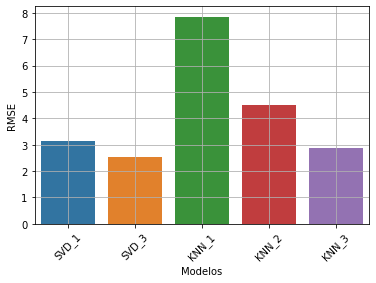

In [84]:
errores = {
    'Modelos': ['SVD_1', 'SVD_3', 'KNN_1', 'KNN_2', 'KNN_3'],
    
    'RMSE': [rmse_svd_1, rmse_svd_3, rmse_knn_1, 
             rmse_knn_2, rmse_knn_3]}

tabla_errores = pd.DataFrame(errores, columns = ['Modelos', 'RMSE'])

sns.barplot(x = 'Modelos', y = 'RMSE', data = tabla_errores)
plt.grid('y')
plt.xticks(rotation = 45)

Concluimos que el modelo con mas rendimiento y que cumple con filtro colaborativo fue:
KNN_3: KNNBaseline con k =3 y sim_options = {'name': 'cosine' ,'user_based': False}

El modelo más performante sin cumplir con ese criterio fue:
SVD_3: SVD con parámetros n_factors=5, n_epochs=20, lr_all=0.005 y reg_all=0.002.

Sin embargo, el problema de recomendaciones que no coinciden con los juegos jugados sigue existiendo. Se requiere un procedimiento independiente del metascore para esto.

#### Pregunta propuesta:
Como ir más allá del metascore en los features del modelo? ¿como usar las horas jugadas y el tag/género?

R: Filtrar primero el dataset por género/etiqueta, entrenando el modelo con esos datos y luego arrojando una predicción


In [85]:
data_reviews.genres.value_counts().index[0]

['Action']

In [86]:
data_reviews_action = data_reviews.copy()
data_reviews_action.genres = data_reviews_action.genres.astype(str)
data_reviews_action = data_reviews_action[data_reviews_action.genres=="['Action']"]
data_reviews_action.head()

,username,hours,product_id,user_id,genres,title,price,metascore
131,Sigmato,20.9,350280,76561198050352619,['Action'],LawBreakers,29.99,76.0
172,Maverick,25.1,350280,76561198260344758,['Action'],LawBreakers,29.99,76.0
184,The Goatnapper,26.2,350280,76561198027738175,['Action'],LawBreakers,29.99,76.0
193,WizardlyOrca,21.1,350280,76561197995145045,['Action'],LawBreakers,29.99,76.0
198,KickazzJack,27.2,350280,76561197970844460,['Action'],LawBreakers,29.99,76.0


In [87]:
data_final = data_reviews_action[['user_id', 'product_id', 'metascore']]
reader = Reader(rating_scale=(1, 100))
data = Dataset.load_from_df(data_final, reader)
anti_set = data.build_full_trainset().build_anti_testset()

sim_options = {'name': 'cosine' ,'user_based':  False}
kf = KFold(n_splits=5)
algo = KNNBaseline(k =3 , sim_options = sim_options)
best_algo = None
best_rmse = 1000.0
best_pred = None
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    if rmse < best_rmse:
        best_rmse= rmse
        best_algo = algo
        best_pred = predictions
        
rmse_knn_4 = best_rmse   
print(best_rmse)

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 2.9717
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 3.4972
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 2.9428
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 3.2313
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 2.9781
2.942839939929256


# Conclusiones

Tuvimos que trabajar solamente con el 70% de Dataset debido al consumo de recursos en cuanto a la memoria RAM en el dispositivo pero se logro mantener una perspectiva eficiente en cuanto a los procedimientos y tecnica en la solucion de este problema.

Predecir recomendaciones mediante rating sirve para casos muy particulares y no es funcional todo el tiempo. Por ejemplo, si abro por primera vez una web de Ecommerce espero ver los productos mejor calificados, pero luego de filtrar de forma manual o buscar de forma repetitiva en la misma web, espero ver que las recomendaciones cada vez más se ajusten a mis parámetros de búsqueda.

Por lo cual, si bien tenía una expectativa de generar recomendaciones con datasets de comportamiento de búsqueda, en realidad solo podemos hacer recomendaciones basadas en los productos de mejor rating.

Finalmente, creo que quizá sea necesario balancear el hecho que algunos usuarios aportan más datos que otros (califican más juegos, generan mas horas y metascore) mediante la sustracción del metascore medio del usuario de todas las calificaciones del mismo.

# Propuesta

Para la 4ta y ultima entrega de este proyecto trabajaremos con un modelo que tenga mejor adaptabilidad con los usuarios y manipulando la variable Found Funny ya que representa si se encontro divertido o no el juego.